# Traffic In Pittsburgh

### By: Anna Cavanaugh and Liam Sullivan

One of the metrics considered for the most aesthetically pleasing neighborhood is the neighborhood with the least amount of traffic. This is because traffic is loud, annoying and just ugly.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, lets read in our data set.

In [6]:
traffic = pd.read_csv("traffic.csv", low_memory = False)

Now, lets find the total number of traffic per neighborhood.

In [7]:
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp = temp.sort_values(ascending = True)
temp

neighborhood
Middle Hill                0.0
Crawford-Roberts           0.0
South Oakland              0.0
Banksville                 0.0
Upper Lawrenceville        0.0
                        ...   
Bloomfield             43101.0
Mount Washington       47336.0
East Liberty           51247.0
Shadyside              66132.0
Squirrel Hill South    79302.0
Name: average_daily_car_traffic, Length: 74, dtype: float64

This is a good start, however some of the neighborhoods in the file are missing data, so lets remove all neighborhoods with no data from consideration. 

In [8]:
query = traffic['average_daily_car_traffic']>0
traffic = traffic[query]
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp = temp.sort_values(ascending = True)
temp

neighborhood
South Side Flats              115.0
Lincoln Place                 126.0
Lincoln-Lemington-Belmar      195.0
Fineview                      419.0
Allegheny West                477.0
                             ...   
Bloomfield                  43101.0
Mount Washington            47336.0
East Liberty                51247.0
Shadyside                   66132.0
Squirrel Hill South         79302.0
Name: average_daily_car_traffic, Length: 64, dtype: float64

Now that we've removed the neighborhoods that there is no data for, we need to average the number of cars by the number of traffic counters are in that neighborhood.

In [21]:
#sort data alphabetically
traffic = traffic.sort_values('neighborhood')
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp2 = traffic['neighborhood'].value_counts()
temp2 =temp2.sort_index()
#divide the number of cars by the number of counters
temp= (temp/temp2).round()

In [22]:
temp = (temp/temp2).round()

In [23]:
temp.sort_values()

neighborhood
Highland Park                 104.0
South Side Flats              115.0
Squirrel Hill South           117.0
Lincoln Place                 126.0
Lincoln-Lemington-Belmar      195.0
                             ...   
East Hills                   4063.0
Duquesne Heights             5831.0
North Shore                 10350.0
Crafton Heights             11500.0
Regent Square               16729.0
Length: 64, dtype: float64

This is much better. Now we have data that represents the average number of cars per counter in each neighborhood, excluding those neighborhoods with no data.

Next, we should separate the bottom five averages to isolate the least traffic neighborhoods.

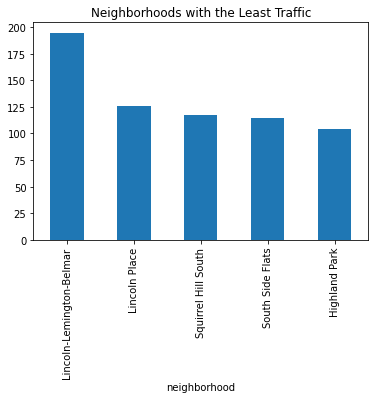

In [31]:
temp = temp.sort_values(ascending=False)
low = temp.tail(5)
low.plot.bar(x = temp[0], y = temp[1], title = "Neighborhoods with the Least Traffic")

Usually, we would show a graphical representation here, but we are looking for the **lowest** amount of traffic, and the lower averages have such a low standard deviation that they would not be easily differentiable when plotted on a map.

## Best Neighborhood
So, extrapolating our data, it is clearly apparent that Highland Park is the best neighborhood traffic wise, with the neighborhood only averaging 104 cars per counter.